# Temporal Descriptive Analysis - Chicago 2017

In this notebook the prepared dataset is used to analyse the temporal dimension of the bike-sharing in Chicago in 2017. The results are then visualized.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
#read dataset
path = "../adrian_workspace/chicago_2017_REDUCED.csv"
bike_data = pd.read_csv(path, parse_dates=["start_time","end_time"], index_col=0)
bike_data.head(1)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_long,start_lat,end_lat,end_long
6,2017-01-01 00:11:34,2017-01-01 00:23:47,194,68,1145,Subscriber,0,1,1,6,-0.6,-0.6,0.0,-87.62603,41.886875,41.875885,-87.640795


### Add trip duration feature

The trip duration is important for understanding the user behaviour. The data has not to be cleaned for outliers since the provider already droped trips lasting longer than 24 hours.

In [4]:
timedelta = bike_data["end_time"] - bike_data["start_time"]
bike_data["duration"] = timedelta.apply(lambda x:x.seconds)
bike_data["duration_min"] = bike_data["duration"].apply(lambda x:(int) (x/60))
bike_data.head(1)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_long,start_lat,end_lat,end_long,duration,duration_min
6,2017-01-01 00:11:34,2017-01-01 00:23:47,194,68,1145,Subscriber,0,1,1,6,-0.6,-0.6,0.0,-87.62603,41.886875,41.875885,-87.640795,733,12


In [5]:
#remove outliers
bike_data["duration_min"].max()

1437

### Overall temporal distribution of bike trips

Overall distribution of when trips are started by hour of the day:

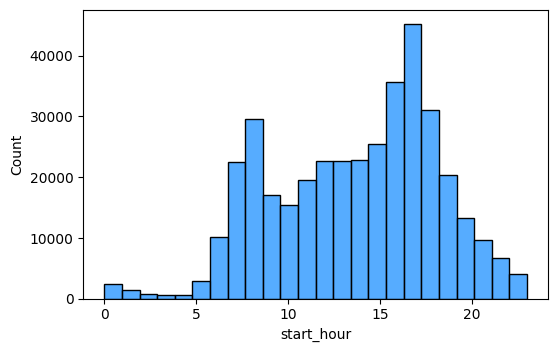

In [6]:
rcParams['figure.figsize'] = 6, 3.75
plot = sns.histplot(data=bike_data, x="start_hour", color="dodgerblue", bins=24)

Trips by weekday:

<AxesSubplot: xlabel='start_weekday', ylabel='Count'>

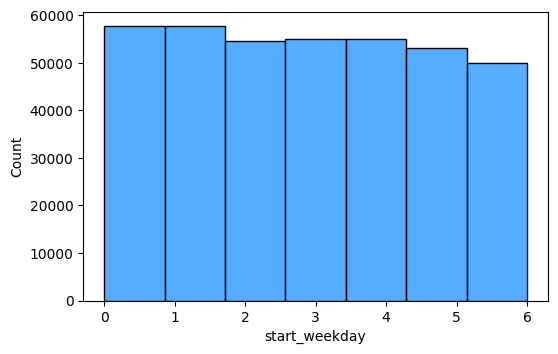

In [7]:
sns.histplot(data=bike_data, x="start_weekday", color="dodgerblue", bins= 7)

Trips by month:

<AxesSubplot: xlabel='start_month', ylabel='Count'>

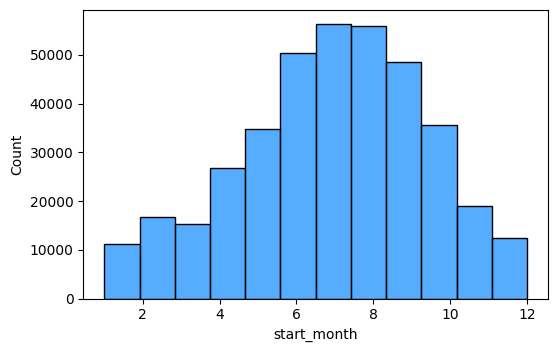

In [8]:
sns.histplot(data=bike_data, x="start_month", color="dodgerblue", bins= 12)

Next is the distribution of trip durations. The bars here are worped since the majority of trips are around 10 minutes in length.

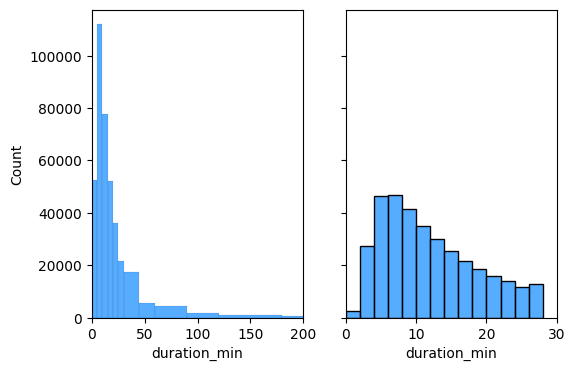

In [9]:
bins_overview = [0,5,10,15,20,25,30,45,60,90,120,180,1440]
bins_zoomed = range(0,30,2)
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
plot = sns.histplot(data=bike_data, x="duration_min", color="dodgerblue", bins=bins_overview, ax=axes[0])
plot.set(xlim=(0,200))
plot = sns.histplot(data=bike_data, x="duration_min", color="dodgerblue", bins=bins_zoomed, ax=axes[1])
plot.set(xlim=(0,30))
plt.show()

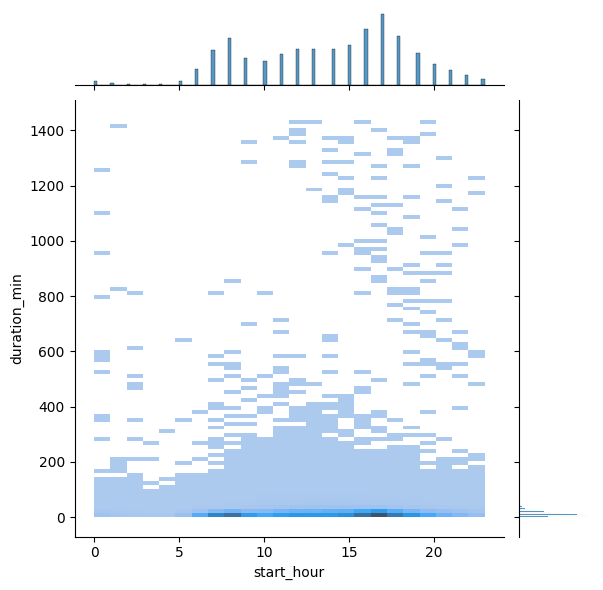

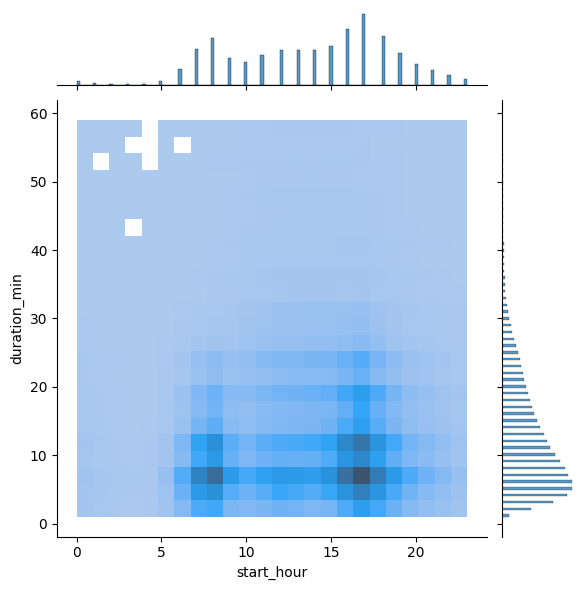

In [43]:
sns.jointplot(data=bike_data, x="start_hour", y="duration_min", kind="hist", bins=[24,100])
sns.jointplot(data=bike_data[bike_data["duration_min"] < 60], x="start_hour", y="duration_min", kind="hist", bins=[24,24])

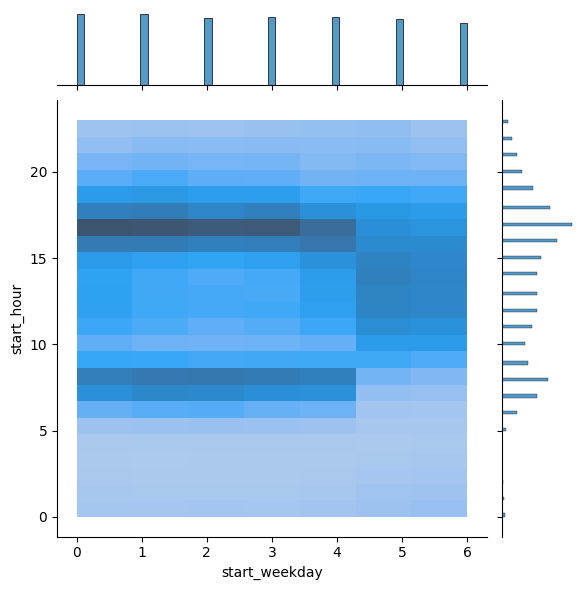

In [45]:
sns.jointplot(data=bike_data, x="start_weekday", y="start_hour", kind="hist", bins=[7,24])

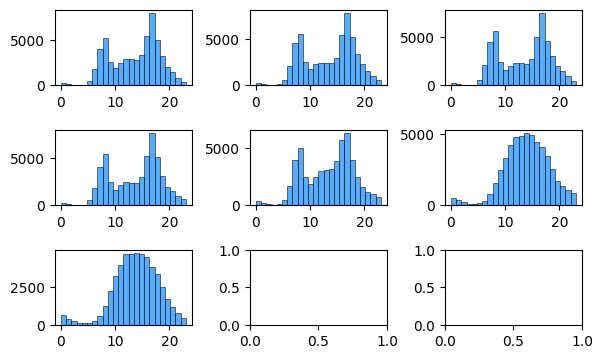

In [37]:
f, axes = plt.subplots(3, 3)
charts = list()
plt.tight_layout()
plt.xlabel("")
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 0], x="start_hour", color="dodgerblue", bins= 24, ax=axes[0,0]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 1], x="start_hour", color="dodgerblue", bins= 24, ax=axes[0,1]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 2], x="start_hour", color="dodgerblue", bins= 24, ax=axes[0,2]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 3], x="start_hour", color="dodgerblue", bins= 24, ax=axes[1,0]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 4], x="start_hour", color="dodgerblue", bins= 24, ax=axes[1,1]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 5], x="start_hour", color="dodgerblue", bins= 24, ax=axes[1,2]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 6], x="start_hour", color="dodgerblue", bins= 24, ax=axes[2,0]))

for chart in charts:
    chart.set(xlabel=None, ylabel=None)
plt.show()

### Incorporate weather data

Since the amount of trips longer than 3 hour is negligible we assume that the weather does not significantly change during a trip (max_temp = min_temp)

In [12]:
print("Trips longer than 3 hours: " + str(len(bike_data[bike_data["duration_min"] >= 180])))
print("Total trips: " + str(len(bike_data.index)))

Trips longer than 3 hours: 768
Total trips: 382895


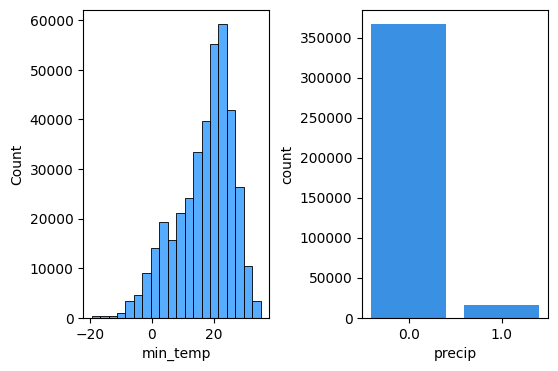

In [13]:
f, axes = plt.subplots(1, 2, figsize=(6, 4))
plt.subplots_adjust(wspace=0.5)
sns.histplot(data=bike_data, x="min_temp", color="dodgerblue", bins= 20, ax=axes[0])
sns.countplot(data=bike_data, x="precip", color="dodgerblue", ax=axes[1])
plt.show()


Compare weekdays with rain or not:

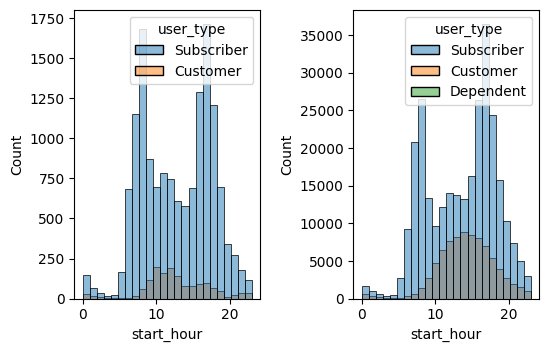

In [24]:
trips_with_rain = bike_data[bike_data["precip"] == 1.0]
trips_no_rain = bike_data[bike_data["precip"] == 0.0]

#number_of_rainy_days = len(trips_with_rain[["start_day","start_month"]].drop_duplicates())

f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
sns.histplot(data=trips_with_rain, x="start_hour", hue="user_type", color="dodgerblue", bins= 24, ax=axes[0])
sns.histplot(data=trips_no_rain, x="start_hour", hue="user_type", color="dodgerblue", bins= 24, ax=axes[1])
plt.show()

(left side ist trips during rain and rigth side is trips without rain)

### Incorporate user type


<AxesSubplot: xlabel='user_type', ylabel='count'>

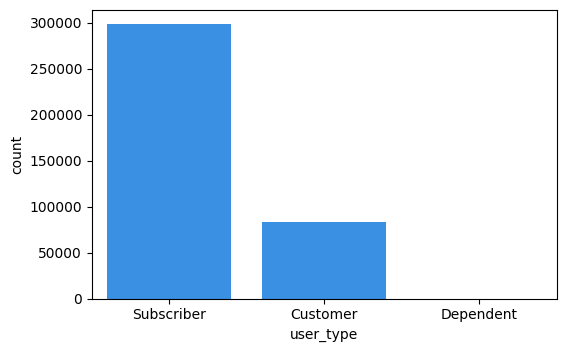

In [15]:
sns.countplot(data=bike_data, x="user_type", color="dodgerblue")

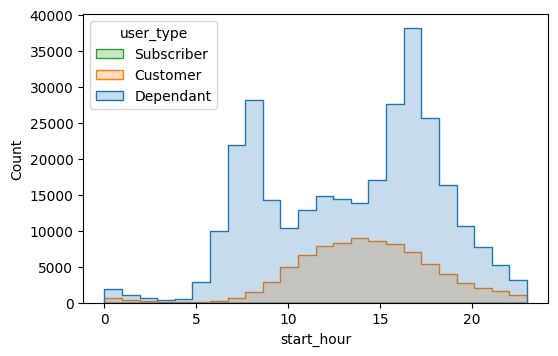

In [16]:
plot = sns.histplot(data=bike_data, x="start_hour", hue="user_type", bins=24, element="step", legend=False)
plt.legend(title='user_type', loc='upper left', labels=['Subscriber', 'Customer',"Dependant"])
plt.show(plot)

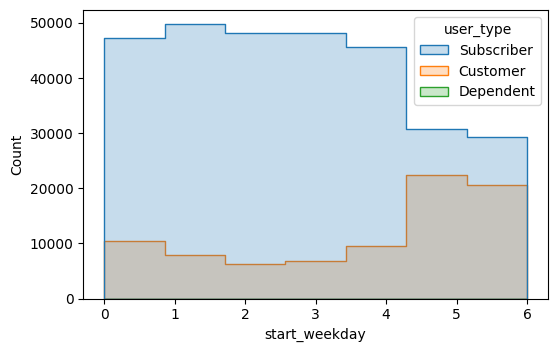

In [17]:
plot = sns.histplot(data=bike_data, x="start_weekday", hue="user_type", bins=7, element="step")

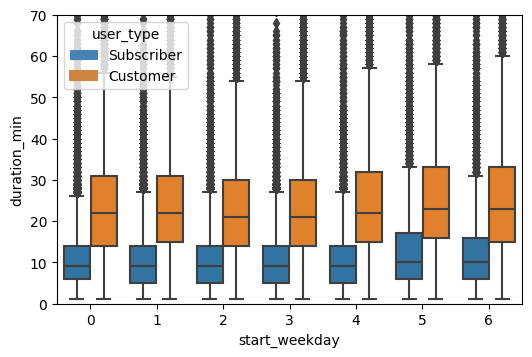

In [18]:
plot = sns.boxplot(x="start_weekday", y="duration_min", data=bike_data[bike_data["user_type"] != "Dependent"], hue ="user_type")
plt.ylim((0,70))
plt.legend(title='user_type', loc='upper left', labels=['Subscriber', 'Customer'])
leg = plot.get_legend()
leg.legendHandles[0].set_color('steelblue')
leg.legendHandles[1].set_color('peru')
plt.show(plot)

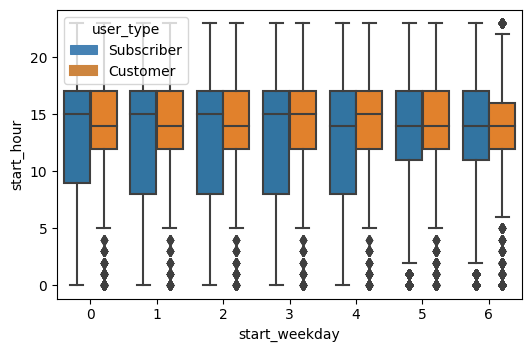

In [21]:
plot = sns.boxplot(x="start_weekday", y="start_hour", data=bike_data[bike_data["user_type"] != "Dependent"], hue ="user_type")
plt.legend(title='user_type', loc='upper left', labels=['Subscriber', 'Customer'])
leg = plot.get_legend()
leg.legendHandles[0].set_color('steelblue')
leg.legendHandles[1].set_color('peru')
plt.show(plot)

In [20]:
#TODO seperate more between weekday and weekend, focus some on yearly/monthly, scale scatterplot